## Model development for AirBnb regression analysis

### List of regressors used

* OLS (Ordinary Least Squares) Regression
* XG Boost
* Light GBM

In [1]:
import os 
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import csv 
import json 
import joblib
import pickle as pk

In [2]:
!wget https://raw.githubusercontent.com/aziz0519/Advanced-Data-Science-Capstone-Project/master/listings.csv

--2023-02-08 02:05:06--  https://raw.githubusercontent.com/aziz0519/Advanced-Data-Science-Capstone-Project/master/listings.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1188761 (1.1M) [text/plain]
Saving to: ‘listings.csv’

listings.csv        100%[===================>]   1.13M  --.-KB/s    in 0.007s  

2023-02-08 02:05:06 (164 MB/s) - ‘listings.csv’ saved [1188761/1188761]



In [3]:
listings_df = pd.read_csv('listings.csv', encoding ='ISO-8859-1')
listings_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,84,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,80,90,18,2014-12-26,0.25,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,70,6,20,2015-10-01,0.19,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,207,1,20,2020-01-17,0.20,8,365
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,95,1,24,2019-10-13,0.23,8,365


In [4]:
!wget https://raw.githubusercontent.com/hxchua/datadoubleconfirm/master/datasets/mrtsg.csv 

--2023-02-08 02:12:13--  https://raw.githubusercontent.com/hxchua/datadoubleconfirm/master/datasets/mrtsg.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15722 (15K) [text/plain]
Saving to: ‘mrtsg.csv’

mrtsg.csv           100%[===================>]  15.35K  --.-KB/s    in 0s      

2023-02-08 02:12:13 (99.0 MB/s) - ‘mrtsg.csv’ saved [15722/15722]



In [5]:
mrt_data = pd.read_csv('mrtsg.csv', encoding = 'ISO-8859-1')
mrt_data.head()

,OBJECTID,STN_NAME,STN_NO,X,Y,Latitude,Longitude,COLOR
0,12,ADMIRALTY MRT STATION,NS10,24402.1063,46918.1131,1.440585,103.800998,RED
1,16,ALJUNIED MRT STATION,EW9,33518.6049,33190.0020,1.316433,103.882893,GREEN
2,33,ANG MO KIO MRT STATION,NS16,29807.2655,39105.7720,1.369933,103.849553,RED
3,81,BAKAU LRT STATION,SE3,36026.0821,41113.8766,1.388093,103.905418,OTHERS
4,80,BANGKIT LRT STATION,BP9,21248.2460,40220.9693,1.380018,103.772667,OTHERS


In [6]:
from geopy.distance import geodesic

In [7]:
def nearest_distance(nb_row, mrt_lrt):
  """
  The following function calculates the distance 
  of each Airbnb property to the nearest MRT or LRT
  """
  pass
  nb_lat , nb_long = nb_row[['latitude','longitude']]
  min_distance = 9999.00
  for stn_lat , stn_lng in zip(mrt_data['Latitude'],mrt_data['Longitude']):
    distance = geodesic((nb_lat,nb_long),(stn_lat,stn_lng)).km
    if distance < min_distance:
      min_distance = distance 
  return min_distance

In [8]:
%%time
listings_df['distance_to_nearest_stn'] = listings_df.apply(nearest_distance, axis=1,mrt_lrt = mrt_data)

CPU times: user 5min 4s, sys: 642 ms, total: 5min 5s
Wall time: 5min 6s


In [9]:
listings_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,distance_to_nearest_stn
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,84,180,1,2013-10-21,0.01,2,365,0.617939
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,80,90,18,2014-12-26,0.25,1,365,0.397868
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,70,6,20,2015-10-01,0.19,2,365,0.524388
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,207,1,20,2020-01-17,0.20,8,365,0.486465
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,95,1,24,2019-10-13,0.23,8,365,0.479073


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
import warnings
warnings.simplefilter("ignore")

In [11]:
#Drop the columns which are not required for the analysis and predictive model
listings_df.drop(['id','name','host_id','host_name','last_review','reviews_per_month'],axis=1,inplace=True)
listings_df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,distance_to_nearest_stn
0,North Region,Woodlands,1.44255,103.79580,Private room,84,180,1,2,365,0.617939
1,Central Region,Bukit Timah,1.33235,103.78521,Private room,80,90,18,1,365,0.397868
2,North Region,Woodlands,1.44246,103.79667,Private room,70,6,20,2,365,0.524388
3,East Region,Tampines,1.34541,103.95712,Private room,207,1,20,8,365,0.486465
4,East Region,Tampines,1.34567,103.95963,Private room,95,1,24,8,365,0.479073


In [12]:
listings_df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
distance_to_nearest_stn           0
dtype: int64

In [13]:
listings_df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


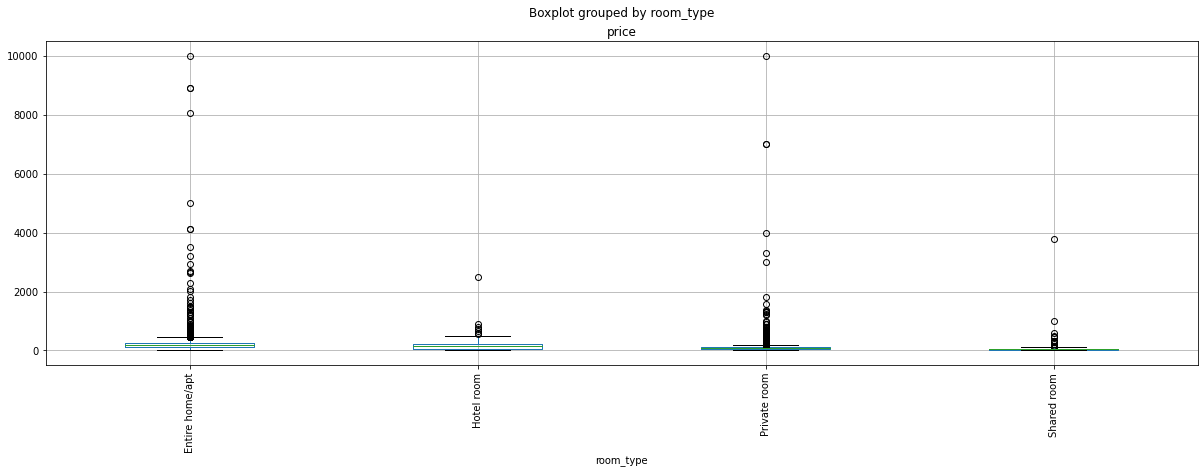

In [14]:
listings_df.boxplot(column='price', by='room_type',figsize=(20,6), rot=90)

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


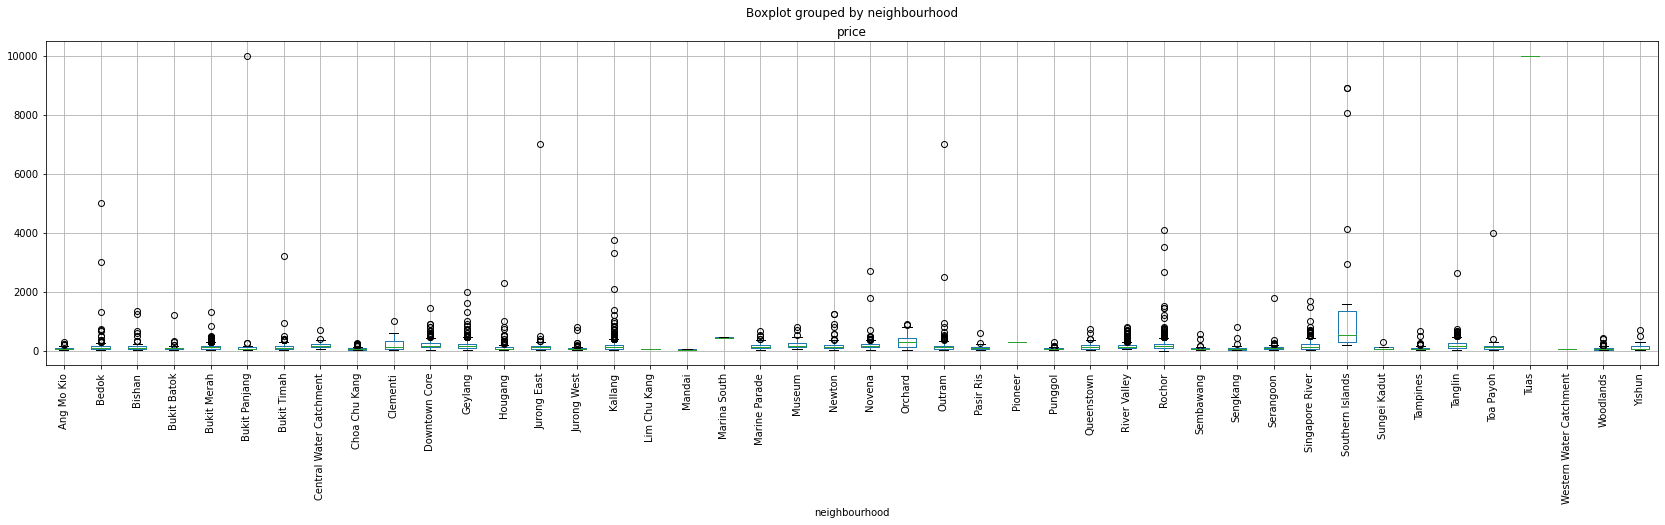

In [15]:
listings_df.boxplot(column='price', by='neighbourhood',figsize=(28,6), rot=90)

In [16]:
listings_df[listings_df['availability_365'] == 365].count()

neighbourhood_group               1529
neighbourhood                     1529
latitude                          1529
longitude                         1529
room_type                         1529
price                             1529
minimum_nights                    1529
number_of_reviews                 1529
calculated_host_listings_count    1529
availability_365                  1529
distance_to_nearest_stn           1529
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/utils.py:328: UserWarning: Use the colorbar set_ticks() method instead.
  ax_i.set_yticks(newticks)


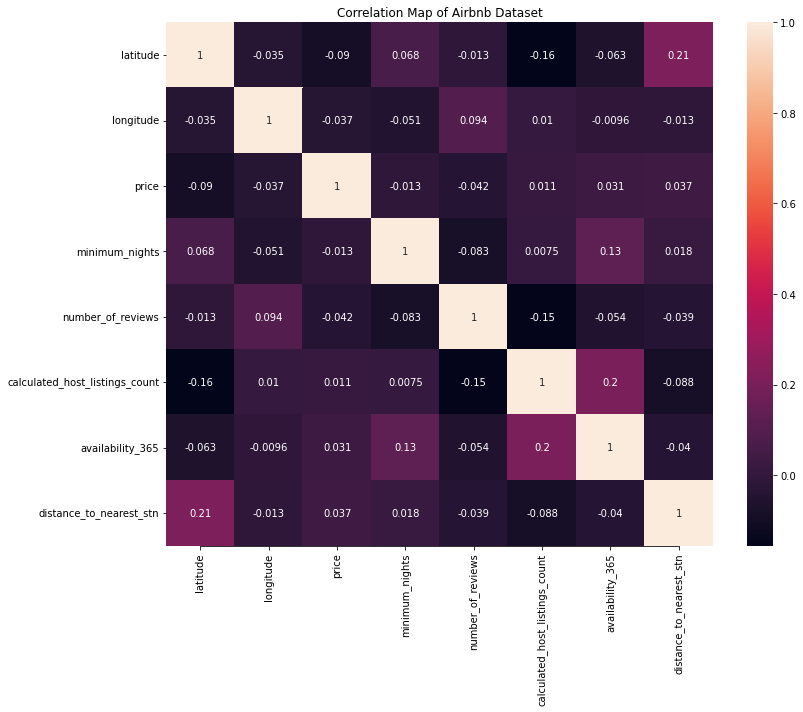

In [17]:
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(listings_df.corr(), annot=True)
ax.set(title='Correlation Map of Airbnb Dataset')
ax.xaxis.grid(False)
sns.despine(left=True,trim=True)
plt.tight_layout()
plt.show()

### Remove Outliers from Dataset 

* Distance over 5km from nearest MRT/LRT
* Minimum nights is over a year (365 days)
* Remove prices with null values 
* Replace outliers in latitude with median values

In [18]:
listings_df = listings_df[listings_df.distance_to_nearest_stn < 5]
listings_df = listings_df[listings_df.minimum_nights <= 365]
listings_df = listings_df[listings_df.price > 0]

listings_df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,distance_to_nearest_stn
0,North Region,Woodlands,1.44255,103.79580,Private room,84,180,1,2,365,0.617939
1,Central Region,Bukit Timah,1.33235,103.78521,Private room,80,90,18,1,365,0.397868
2,North Region,Woodlands,1.44246,103.79667,Private room,70,6,20,2,365,0.524388
3,East Region,Tampines,1.34541,103.95712,Private room,207,1,20,8,365,0.486465
4,East Region,Tampines,1.34567,103.95963,Private room,95,1,24,8,365,0.479073


In [19]:
listings_df.shape

(8040, 11)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


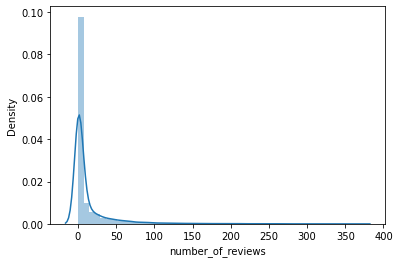

In [20]:
sns.distplot(listings_df['number_of_reviews'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


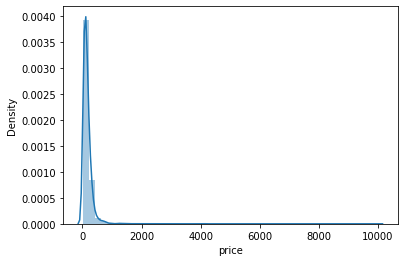

In [21]:
sns.distplot(listings_df['price'])

In [23]:
listings_df['latitude'].describe()

count    8040.000000
mean        1.313404
std         0.030400
min         1.243870
25%         1.296020
50%         1.310995
75%         1.321442
max         1.454590
Name: latitude, dtype: float64

In [24]:
#for latitude
std=np.std(listings_df['latitude'])
mean=np.mean(listings_df['latitude'])
median=np.median(listings_df['latitude'])
outliers=[]
for x in listings_df['latitude']:
    zscore=(x-mean)/std
    if zscore>abs(3):
        outliers.append(x)

len(outliers)

193

In [25]:
listings_df = listings_df.replace(outliers, median)

In [26]:
#for longitude
std=np.std(listings_df['longitude'])
mean=np.mean(listings_df['longitude'])
median=np.median(listings_df['longitude'])
outliers=[]
for x in listings_df['longitude']:
    zscore=(x-mean)/std
    if -3<zscore>3:
        outliers.append(x)

len(outliers)

0

### Encoding of categorical variables 

In [27]:
#Inspect the variables for room_type
listings_df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [28]:
listings_df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,distance_to_nearest_stn
0,North Region,Woodlands,1.310995,103.79580,Private room,84,180,1,2,365,0.617939
1,Central Region,Bukit Timah,1.332350,103.78521,Private room,80,90,18,1,365,0.397868
2,North Region,Woodlands,1.310995,103.79667,Private room,70,6,20,2,365,0.524388
3,East Region,Tampines,1.345410,103.95712,Private room,207,1,20,8,365,0.486465
4,East Region,Tampines,1.345670,103.95963,Private room,95,1,24,8,365,0.479073


In [29]:
# listings_df.drop(['neighbourhood_group'], axis=1, inplace=True)
listings_df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,distance_to_nearest_stn
0,North Region,Woodlands,1.310995,103.79580,Private room,84,180,1,2,365,0.617939
1,Central Region,Bukit Timah,1.332350,103.78521,Private room,80,90,18,1,365,0.397868
2,North Region,Woodlands,1.310995,103.79667,Private room,70,6,20,2,365,0.524388
3,East Region,Tampines,1.345410,103.95712,Private room,207,1,20,8,365,0.486465
4,East Region,Tampines,1.345670,103.95963,Private room,95,1,24,8,365,0.479073


In [30]:
listings_df[ listings_df['number_of_reviews'] == 0 ].count()

neighbourhood_group               2925
neighbourhood                     2925
latitude                          2925
longitude                         2925
room_type                         2925
price                             2925
minimum_nights                    2925
number_of_reviews                 2925
calculated_host_listings_count    2925
availability_365                  2925
distance_to_nearest_stn           2925
dtype: int64

In [31]:
listings_df = listings_df[listings_df.number_of_reviews > 0]
listings_df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,distance_to_nearest_stn
0,North Region,Woodlands,1.310995,103.79580,Private room,84,180,1,2,365,0.617939
1,Central Region,Bukit Timah,1.332350,103.78521,Private room,80,90,18,1,365,0.397868
2,North Region,Woodlands,1.310995,103.79667,Private room,70,6,20,2,365,0.524388
3,East Region,Tampines,1.345410,103.95712,Private room,207,1,20,8,365,0.486465
4,East Region,Tampines,1.345670,103.95963,Private room,95,1,24,8,365,0.479073


In [ ]:
listings_df.shape[0]

5115

In [32]:
listings_df['logreviews'] = np.log( 1 + listings_df['number_of_reviews'])
listings_df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,distance_to_nearest_stn,logreviews
0,North Region,Woodlands,1.310995,103.79580,Private room,84,180,1,2,365,0.617939,0.693147
1,Central Region,Bukit Timah,1.332350,103.78521,Private room,80,90,18,1,365,0.397868,2.944439
2,North Region,Woodlands,1.310995,103.79667,Private room,70,6,20,2,365,0.524388,3.044522
3,East Region,Tampines,1.345410,103.95712,Private room,207,1,20,8,365,0.486465,3.044522
4,East Region,Tampines,1.345670,103.95963,Private room,95,1,24,8,365,0.479073,3.218876


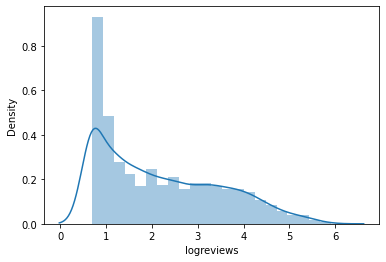

In [33]:
sns.distplot(listings_df['logreviews'])

In [34]:
listings_df['avail_365'] = listings_df['availability_365'].apply(lambda x : 1 if x == 365 else 0 )
listings_df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,distance_to_nearest_stn,logreviews,avail_365
0,North Region,Woodlands,1.310995,103.79580,Private room,84,180,1,2,365,0.617939,0.693147,1
1,Central Region,Bukit Timah,1.332350,103.78521,Private room,80,90,18,1,365,0.397868,2.944439,1
2,North Region,Woodlands,1.310995,103.79667,Private room,70,6,20,2,365,0.524388,3.044522,1
3,East Region,Tampines,1.345410,103.95712,Private room,207,1,20,8,365,0.486465,3.044522,1
4,East Region,Tampines,1.345670,103.95963,Private room,95,1,24,8,365,0.479073,3.218876,1


In [35]:
listings_df['avail_365'].value_counts()

0    4370
1     745
Name: avail_365, dtype: int64

In [36]:
listings_df[listings_df['avail_365'] == 0]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,distance_to_nearest_stn,logreviews,avail_365
5,East Region,Tampines,1.34702,103.96103,Private room,105,1,48,8,358,0.585865,3.891820,0
6,East Region,Tampines,1.34348,103.96337,Private room,209,1,29,8,174,0.288820,3.401197,0
7,East Region,Bedok,1.32391,103.91277,Private room,52,90,176,4,248,0.318031,5.176150,0
8,East Region,Bedok,1.32391,103.91277,Private room,54,90,199,4,357,0.318031,5.298317,0
9,East Region,Bedok,1.32391,103.91277,Private room,40,90,236,4,330,0.318031,5.468060,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7770,Central Region,Bukit Timah,1.32589,103.80837,Shared room,15,6,1,2,359,0.115833,0.693147,0
7787,Central Region,Geylang,1.31153,103.87643,Private room,70,1,1,39,364,0.562414,0.693147,0
7798,West Region,Jurong West,1.34259,103.71942,Entire home/apt,117,1,4,5,76,0.253411,1.609438,0
7812,Central Region,Downtown Core,1.28500,103.84878,Private room,138,1,1,17,177,0.304450,0.693147,0


In [37]:
listings_df.drop(['number_of_reviews','availability_365'],axis=1, inplace=True)
listings_df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,distance_to_nearest_stn,logreviews,avail_365
0,North Region,Woodlands,1.310995,103.79580,Private room,84,180,2,0.617939,0.693147,1
1,Central Region,Bukit Timah,1.332350,103.78521,Private room,80,90,1,0.397868,2.944439,1
2,North Region,Woodlands,1.310995,103.79667,Private room,70,6,2,0.524388,3.044522,1
3,East Region,Tampines,1.345410,103.95712,Private room,207,1,8,0.486465,3.044522,1
4,East Region,Tampines,1.345670,103.95963,Private room,95,1,8,0.479073,3.218876,1


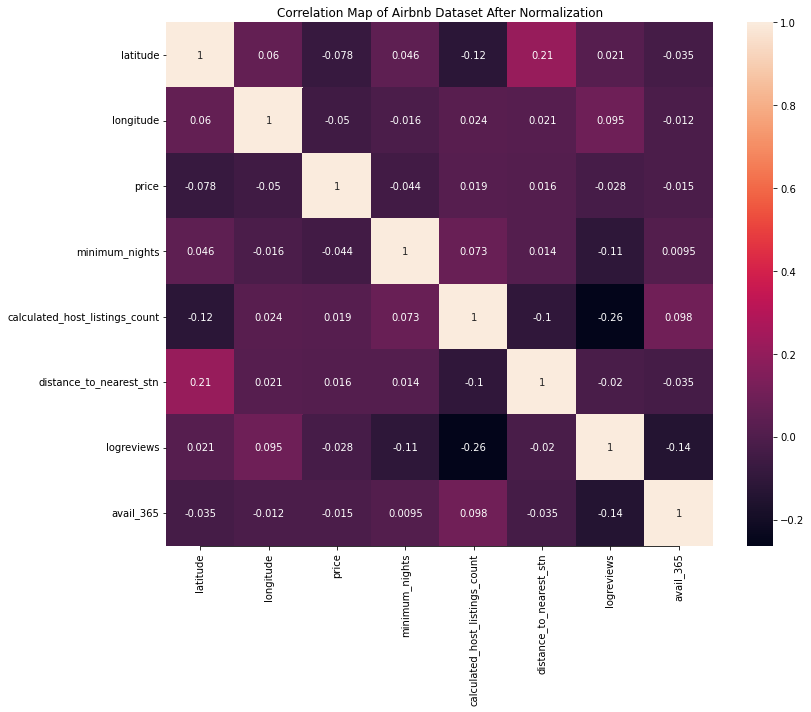

In [38]:
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(listings_df.corr(), annot=True)
ax.set(title='Correlation Map of Airbnb Dataset After Normalization')
ax.xaxis.grid(False)
sns.despine(left=True,trim=True)
plt.tight_layout()
plt.show()

In [39]:
listings_df.drop(['neighbourhood_group'], axis=1, inplace=True)
listings_df.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,distance_to_nearest_stn,logreviews,avail_365
0,Woodlands,1.310995,103.79580,Private room,84,180,2,0.617939,0.693147,1
1,Bukit Timah,1.332350,103.78521,Private room,80,90,1,0.397868,2.944439,1
2,Woodlands,1.310995,103.79667,Private room,70,6,2,0.524388,3.044522,1
3,Tampines,1.345410,103.95712,Private room,207,1,8,0.486465,3.044522,1
4,Tampines,1.345670,103.95963,Private room,95,1,8,0.479073,3.218876,1


In [40]:
data = listings_df.copy()
len(data)

5115

In [41]:
data['log_min_nights'] = np.log1p(data['minimum_nights'])
data['log_listings_count'] = np.log1p(data['calculated_host_listings_count'])
data['log_nearest_distance'] = np.log1p(data['distance_to_nearest_stn'])
data.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,distance_to_nearest_stn,logreviews,avail_365,log_min_nights,log_listings_count,log_nearest_distance
0,Woodlands,1.310995,103.79580,Private room,84,180,2,0.617939,0.693147,1,5.198497,1.098612,0.481153
1,Bukit Timah,1.332350,103.78521,Private room,80,90,1,0.397868,2.944439,1,4.510860,0.693147,0.334948
2,Woodlands,1.310995,103.79667,Private room,70,6,2,0.524388,3.044522,1,1.945910,1.098612,0.421593
3,Tampines,1.345410,103.95712,Private room,207,1,8,0.486465,3.044522,1,0.693147,2.197225,0.396401
4,Tampines,1.345670,103.95963,Private room,95,1,8,0.479073,3.218876,1,0.693147,2.197225,0.391416


In [42]:
data.drop(['minimum_nights','calculated_host_listings_count','distance_to_nearest_stn'], axis=1,inplace=True)
data.head()

,neighbourhood,latitude,longitude,room_type,price,logreviews,avail_365,log_min_nights,log_listings_count,log_nearest_distance
0,Woodlands,1.310995,103.79580,Private room,84,0.693147,1,5.198497,1.098612,0.481153
1,Bukit Timah,1.332350,103.78521,Private room,80,2.944439,1,4.510860,0.693147,0.334948
2,Woodlands,1.310995,103.79667,Private room,70,3.044522,1,1.945910,1.098612,0.421593
3,Tampines,1.345410,103.95712,Private room,207,3.044522,1,0.693147,2.197225,0.396401
4,Tampines,1.345670,103.95963,Private room,95,3.218876,1,0.693147,2.197225,0.391416


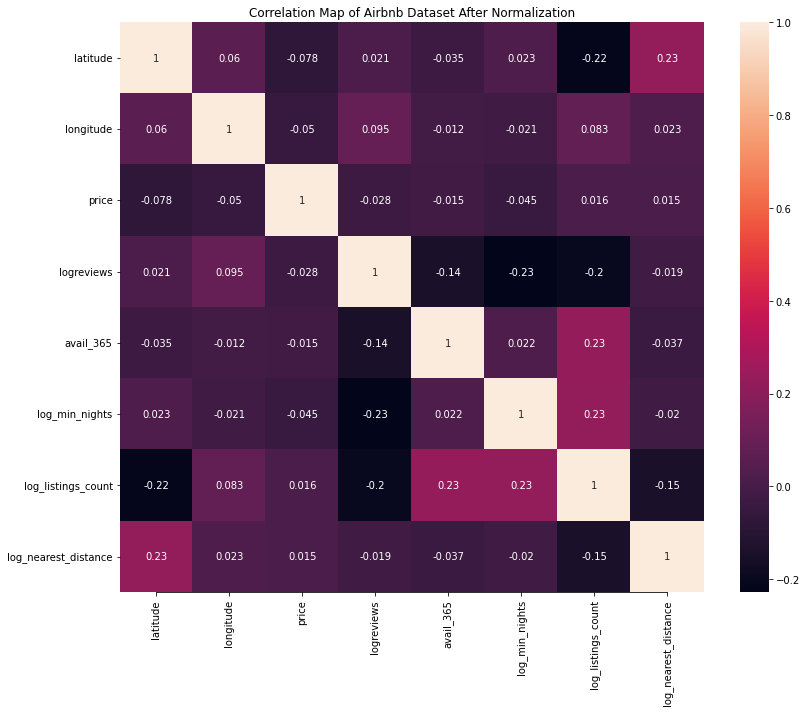

In [43]:
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(data.corr(), annot=True)
ax.set(title='Correlation Map of Airbnb Dataset After Normalization')
ax.xaxis.grid(False)
sns.despine(left=True,trim=True)
plt.tight_layout()
plt.show()

In [44]:
data = pd.get_dummies(data,prefix=['room_type','neighbourhood'])
data.head()

,latitude,longitude,price,logreviews,avail_365,log_min_nights,log_listings_count,log_nearest_distance,room_type_Ang Mo Kio,room_type_Bedok,...,room_type_Tanglin,room_type_Toa Payoh,room_type_Tuas,room_type_Western Water Catchment,room_type_Woodlands,room_type_Yishun,neighbourhood_Entire home/apt,neighbourhood_Hotel room,neighbourhood_Private room,neighbourhood_Shared room
0,1.310995,103.79580,84,0.693147,1,5.198497,1.098612,0.481153,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1.332350,103.78521,80,2.944439,1,4.510860,0.693147,0.334948,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1.310995,103.79667,70,3.044522,1,1.945910,1.098612,0.421593,0,0,...,0,0,0,0,1,0,0,0,1,0
3,1.345410,103.95712,207,3.044522,1,0.693147,2.197225,0.396401,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1.345670,103.95963,95,3.218876,1,0.693147,2.197225,0.391416,0,0,...,0,0,0,0,0,0,0,0,1,0


In [45]:
X = data.copy().drop('price', axis = 1)
y = np.log1p(data['price'].copy())

In [46]:
X.head()

,latitude,longitude,logreviews,avail_365,log_min_nights,log_listings_count,log_nearest_distance,room_type_Ang Mo Kio,room_type_Bedok,room_type_Bishan,...,room_type_Tanglin,room_type_Toa Payoh,room_type_Tuas,room_type_Western Water Catchment,room_type_Woodlands,room_type_Yishun,neighbourhood_Entire home/apt,neighbourhood_Hotel room,neighbourhood_Private room,neighbourhood_Shared room
0,1.310995,103.79580,0.693147,1,5.198497,1.098612,0.481153,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1.332350,103.78521,2.944439,1,4.510860,0.693147,0.334948,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1.310995,103.79667,3.044522,1,1.945910,1.098612,0.421593,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,1.345410,103.95712,3.044522,1,0.693147,2.197225,0.396401,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1.345670,103.95963,3.218876,1,0.693147,2.197225,0.391416,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [47]:
y.head()

0    4.442651
1    4.394449
2    4.262680
3    5.337538
4    4.564348
Name: price, dtype: float64

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [50]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
baseline = y_train.median()
print(baseline)

4.7535901911063645


In [52]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [53]:
baseline_error = np.sqrt(mean_squared_error(y_pred=np.ones_like(y_test) * baseline, y_true=y_test))
print('And we will be right +- ' + str(baseline_error))

And we will be right +- 0.725857912806441


In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge , RidgeCV, LinearRegression
from sklearn.svm import SVR
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.model_selection import KFold,cross_val_score, GridSearchCV

In [56]:
from sklearn.ensemble import AdaBoostRegressor

In [55]:
from sklearn.ensemble import StackingRegressor

In [57]:
# X_train, X_test , y_train , y_test = train_test_split(X,y, test_size=0.33, random_state=42)
kf = KFold(n_splits=10,random_state=None,shuffle=True)

In [58]:
def rmse(y, y_pred):
  return np.sqrt(mean_squared_error(y,y_pred))

In [59]:
def rmsecv(model, X= X_train):
  rmsev = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=kf))
  return rmsev

### Build 5 Regressor Models

In [60]:
## SVR with Radial Basis Function
svr_model = SVR(kernel='linear',C=1.0,degree=5,cache_size=100,epsilon=0.2)

In [61]:
## Random Forest Model
rf_model =  RandomForestRegressor(n_estimators=650,min_samples_split=5,max_depth=7,oob_score=False,random_state=42)

In [62]:
## XG Boost Regressor
xgb_model = XGBRegressor(learning_rate=0.01,n_estimators=500,max_depth=8,objective='reg:squarederror',nthread=1,random_state=42)

In [63]:
## Light GBM Regressor 
lgb_model = LGBMRegressor(objective='regression',num_leaves=5,n_estimators=700,max_depth=7, learning_rate=0.03)

In [64]:
## Ada Boost Regressor
ada_model = AdaBoostRegressor(n_estimators=650,learning_rate=0.05,loss='linear',random_state=42)

In [65]:
scores = {}

score = rmsecv(svr_model)
print("svr: {:.4f} ({:.4f})".format(score.mean(),score.std()))
scores['SVR'] = (score.mean(),score.std())

svr: 0.5587 (0.0246)


In [66]:
%%time
score = rmsecv(rf_model)
print("Random Forest: {:.4f} ({:.4f})".format(score.mean(),score.std()))
scores['Random Forest'] = (score.mean(),score.std())

Random Forest: 0.4964 (0.0231)
CPU times: user 55.9 s, sys: 102 ms, total: 56 s
Wall time: 58.2 s


In [67]:
score = rmsecv(xgb_model)
print("XG Boost: {:.4f} ({:.4f})".format(score.mean(),score.std()))
scores['XG Boost'] = (score.mean(),score.std())

XG Boost: 0.4533 (0.0402)


In [68]:
score = rmsecv(lgb_model)
print("Light GBM: {:.4f} ({:.4f})".format(score.mean(),score.std()))
scores['Light GBM'] = (score.mean(),score.std())

Light GBM: 0.4751 (0.0385)


In [69]:
score = rmsecv(ada_model)
print("Ada Boost: {:.4f} ({:.4f})".format(score.mean(),score.std()))
scores['Ada Boost'] = (score.mean(),score.std())

Ada Boost: 0.6008 (0.0320)


In [70]:
## SVR
svr_model_reg = svr_model.fit(X_train,y_train)
y_pred_svr = svr_model_reg.predict(X_test)
error_airbnb_svr = pd.DataFrame({
        'Actual Values': np.array(np.expm1(y_test)).flatten(),
        'Predicted Values': np.expm1(y_pred_svr).flatten()})
error_airbnb_svr.head()

,Actual Values,Predicted Values
0,145.0,166.276469
1,168.0,147.196006
2,151.0,112.666015
3,189.0,120.697568
4,21.0,29.466465


In [71]:
rmse_svr = rmse(y_test,y_pred_svr)
mae_svr = mean_absolute_error(y_test,y_pred_svr)
r2_svr = r2_score(y_test,y_pred_svr)
print("The RMSLE of SVR model is: {:.4f}".format(rmse_svr))
print("The MAE of SVR model is: {:.4f}".format(mae_svr))
print("The R2 score of SVR model is: {:.4f}".format(r2_svr))

The RMSLE of SVR model is: 0.5164
The MAE of SVR model is: 0.3867
The R2 score of SVR model is: 0.4912


In [72]:
## Random Forest Regression
rf_model_reg = rf_model.fit(X_train, y_train)
y_pred_rf = rf_model_reg.predict(X_test)
error_airbnb_rf = pd.DataFrame({
        'Actual Values': np.array(np.expm1(y_test)).flatten(),
        'Predicted Values': np.expm1(y_pred_rf).flatten()})
error_airbnb_rf.head()

,Actual Values,Predicted Values
0,145.0,137.587941
1,168.0,179.766576
2,151.0,110.636058
3,189.0,205.224466
4,21.0,32.749776


In [73]:
rmse_rf = rmse(y_test,y_pred_rf)
mae_rf = mean_absolute_error(y_test,y_pred_rf)
r2_rf = r2_score(y_test,y_pred_rf)
print("The RMSLE of Random Forest model is: {:.4f}".format(rmse_rf))
print("The MAE of Random Forest model is: {:.4f}".format(mae_rf))
print("The R2 score of Random Forest model is: {:.4f}".format(r2_rf))

The RMSLE of Random Forest model is: 0.4612
The MAE of Random Forest model is: 0.3511
The R2 score of Random Forest model is: 0.5941


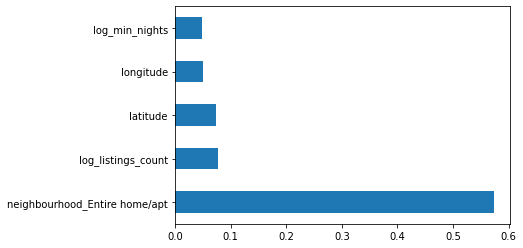

In [74]:
importance = pd.Series(np.abs(rf_model.feature_importances_))
importance.index = X.columns
#importance.sort_values(inplace=True, ascending=False)
importance.nlargest(5).plot(kind='barh')

In [75]:
xgb_model_reg = xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model_reg.predict(X_test)
error_airbnb_xgb = pd.DataFrame({
        'Actual Values': np.array(np.expm1(y_test)).flatten(),
        'Predicted Values': np.expm1(y_pred_xgb).flatten()})
error_airbnb_xgb.head()

,Actual Values,Predicted Values
0,145.0,124.200623
1,168.0,171.927521
2,151.0,190.524887
3,189.0,161.653229
4,21.0,28.947220


In [76]:
rmse_xgb = rmse(y_test,y_pred_xgb)
mae_xgb = mean_absolute_error(y_test,y_pred_xgb)
r2_xgb = r2_score(y_test,y_pred_xgb)
print("The RMSLE of XG Boost model is: {:.4f}".format(rmse_xgb))
print("The MAE of XG Boost model is: {:.4f}".format(mae_xgb))
print("The R2 score of XG Boost model is: {:.4f}".format(r2_xgb))

The RMSLE of XG Boost model is: 0.4259
The MAE of XG Boost model is: 0.3105
The R2 score of XG Boost model is: 0.6538


In [77]:
lgb_model_reg = lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model_reg.predict(X_test)
error_airbnb_lgb = pd.DataFrame({
        'Actual Values': np.array(np.expm1(y_test)).flatten(),
        'Predicted Values': np.expm1(y_pred_lgb).flatten()})
error_airbnb_lgb.head()

,Actual Values,Predicted Values
0,145.0,138.872245
1,168.0,185.114213
2,151.0,152.776593
3,189.0,150.842226
4,21.0,40.161057


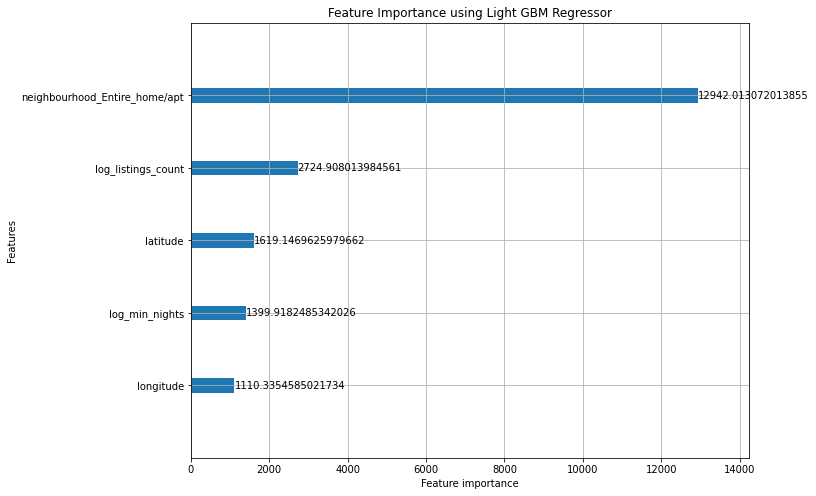

In [78]:
lgb.plot_importance(lgb_model,figsize=(10,8),title='Feature Importance using Light GBM Regressor',importance_type='gain',max_num_features=5)

In [79]:
rmse_lgb = rmse(y_test,y_pred_lgb)
mae_lgb = mean_absolute_error(y_test,y_pred_lgb)
r2_lgb = r2_score(y_test,y_pred_lgb)
print("The RMSLE of Light GBM model is: {:.4f}".format(rmse_lgb))
print("The MAE of Light GBM model is: {:.4f}".format(mae_lgb))
print("The R2 score of Light GBM model is: {:.4f}".format(r2_lgb))

The RMSLE of Light GBM model is: 0.4413
The MAE of Light GBM model is: 0.3342
The R2 score of Light GBM model is: 0.6285


In [80]:
ada_model_reg = ada_model.fit(X_train, y_train)
y_pred_ada = ada_model_reg.predict(X_test)
error_airbnb_ada = pd.DataFrame({
        'Actual Values': np.array(np.expm1(y_test)).flatten(),
        'Predicted Values': np.expm1(y_pred_ada).flatten()})
error_airbnb_ada.head()

,Actual Values,Predicted Values
0,145.0,150.980685
1,168.0,180.323215
2,151.0,91.286959
3,189.0,192.284810
4,21.0,75.160975


In [81]:
rmse_ada = rmse(y_test,y_pred_ada)
mae_ada = mean_absolute_error(y_test,y_pred_ada)
r2_ada = r2_score(y_test,y_pred_ada)
print("The RMSLE of Ada Boost model is: {:.4f}".format(rmse_lgb))
print("The MAE of Ada Boost model is: {:.4f}".format(mae_lgb))
print("The R2 score of Ada Boost model is: {:.4f}".format(r2_lgb))

The RMSLE of Ada Boost model is: 0.4413
The MAE of Ada Boost model is: 0.3342
The R2 score of Ada Boost model is: 0.6285


### Stacked Regression Model

In [82]:
# lr = LinearRegression(normalize=True)
# lr.fit(X_train,y_train)
# stack_model  = StackingCVRegressor(regressors=(lgb_model,lr,xgb_model),meta_regressor= lgb_model,use_features_in_secondary=False)

In [99]:
## Stacked Regressor using sklearn ensemble module
estimators = [
    ('lg', lgb_model),
    ('xgb', xgb_model)
]
reg = StackingRegressor(
    estimators=estimators,
    final_estimator = rf_model
)

In [ ]:
# lr.coef_

array([-1.50975830e+00, -3.46071520e+00, -3.51117282e-02, -2.16855317e-02,
       -7.24920976e-02,  1.75016776e-04,  2.05967149e-01,  6.93208528e+12,
        6.93208528e+12,  6.93208528e+12,  6.93208528e+12,  6.93208528e+12,
        6.93208528e+12,  6.93208528e+12,  6.93208528e+12,  6.93208528e+12,
        6.93208528e+12,  6.93208528e+12,  6.93208528e+12,  6.93208528e+12,
        6.93208528e+12,  6.93208528e+12,  6.93208528e+12,  6.93208528e+12,
        6.93208528e+12,  6.93208528e+12,  6.93208528e+12,  6.93208528e+12,
        6.93208528e+12,  6.93208528e+12,  6.93208528e+12,  6.93208528e+12,
        6.93208528e+12,  6.93208528e+12,  6.93208528e+12,  6.93208528e+12,
        6.93208528e+12,  6.93208528e+12,  6.93208528e+12,  6.93208528e+12,
        6.93208528e+12,  6.93208528e+12,  6.93208528e+12,  6.93208528e+12,
        6.93208528e+12,  6.93208528e+12,  6.93208528e+12,  6.93208528e+12,
        6.93208528e+12, -4.93413996e+13, -4.93413996e+13, -4.93413996e+13,
       -4.93413996e+13])

In [84]:
# print(rmse(y_test,lr.predict(X_test)))

0.509687803800737


In [85]:
# print(r2_score(y_test,lr.predict(X_test)))

0.504305009346619


In [100]:
%%time
# stack_model.fit(X_train.values,y_train.ravel())
reg.fit(X_train,y_train).score(X_test, y_test)

CPU times: user 34.3 s, sys: 170 ms, total: 34.5 s
Wall time: 34.4 s


0.659038387431666

In [101]:
%%time
# y_pred_stack = stack_model.predict(X_test.values)
y_pred_reg = reg.predict(X_test)

CPU times: user 150 ms, sys: 1.01 ms, total: 151 ms
Wall time: 150 ms


In [102]:
# y_pred_ada = ada_model_reg.predict(X_test)
error_airbnb_stack = pd.DataFrame({
        'Actual Values': np.array(np.expm1(y_test)).flatten(),
        'Predicted Values': np.expm1(y_pred_reg).flatten()})
error_airbnb_stack.head()

,Actual Values,Predicted Values
0,145.0,135.393587
1,168.0,183.932287
2,151.0,189.468627
3,189.0,157.007172
4,21.0,28.115268


In [103]:
rmse_reg = rmse(y_test,y_pred_reg)
mae_reg = mean_absolute_error(y_test,y_pred_reg)
r2_reg = r2_score(y_test,y_pred_reg)
print("The RMSLE of Stack model is: {:.4f}".format(rmse_reg))
print("The MAE of Stack model is: {:.4f}".format(mae_reg))
print("The R2 score of Stack model is: {:.4f}".format(r2_reg))

The RMSLE of Stack model is: 0.4227
The MAE of Stack model is: 0.3103
The R2 score of Stack model is: 0.6590


In [104]:
Eval_scores = {'Model':['SVR','Random Forest','XG Boost','Light GBM','Ada Boost','Stacked Model'],
            'RMSE' : [rmse_svr,rmse_rf,rmse_xgb,rmse_lgb,rmse_ada,rmse_reg],
            'MAE' : [mae_svr,mae_rf,mae_xgb,mae_lgb,mae_ada,mae_reg],
           'R\u00b2 Scores':[r2_svr,r2_rf,r2_xgb,r2_lgb,r2_ada,r2_reg]}
Model_eval = pd.DataFrame.from_dict(Eval_scores)
Model_eval.transpose()

,0,1,2,3,4,5
Model,SVR,Random Forest,XG Boost,Light GBM,Ada Boost,Stacked Model
RMSE,0.516383,0.461236,0.425942,0.44127,0.567164,0.422717
MAE,0.386659,0.351058,0.310545,0.334236,0.457273,0.310325
R² Scores,0.491197,0.594069,0.653815,0.628453,0.386206,0.659038


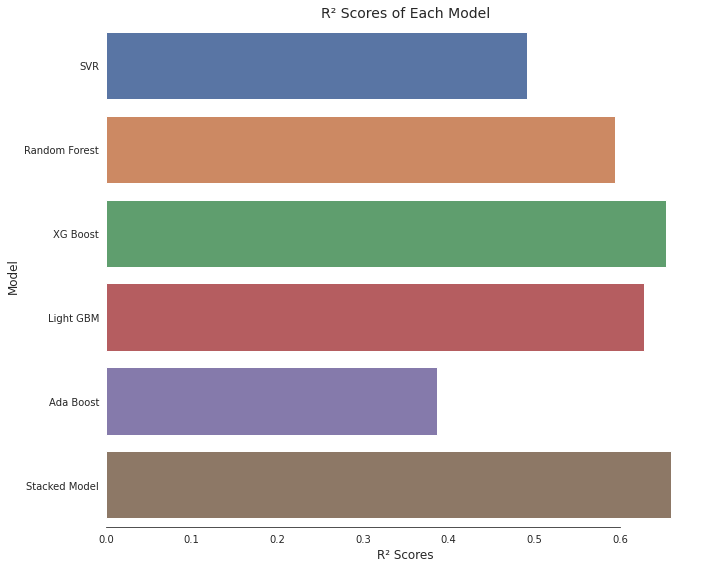

In [105]:
f,ax = plt.subplots(figsize=(10,8))
ax.xaxis.grid(False)
sns.barplot(Model_eval['R\u00b2 Scores'],Model_eval['Model'],hue_order=Model_eval['MAE'])
sns.despine(trim=True,left=True)
sns.set_style('white')
sns.set_palette('deep')
ax.set_xlim(0,0.7)
plt.title('R\u00b2 Scores of Each Model',fontsize=14)
plt.ylabel('Model',fontsize=12)
plt.xlabel('R\u00b2 Scores',fontsize=12)
plt.tight_layout()
plt.show()

In [106]:
import pickle as pk

In [107]:
pickle_out = open("xgb_model.pkl","wb")
pk.dump(xgb_model,pickle_out)
pickle_out.close()